<a href="https://colab.research.google.com/github/mpedraza98/MLTSA22_MPedraza/blob/main/HW5/kmeans_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing
from sklearn import cluster

In [2]:
!#wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

In [3]:
cd drive/MyDrive/MLTSA22/

/content/drive/MyDrive/MLTSA22


In [4]:
!ls

 HW2
'SP.POP.TOTL?downloadformat=excel'
 United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv
 wwo


In [5]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 3.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
pop_df = pd.read_excel("SP.POP.TOTL?downloadformat=excel", skiprows = 3, header=0, usecols = [0] + list(range(4, 400))).set_index("Country Name")

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [7]:
pop_df.isna().sum()

1960    2
1961    2
1962    2
1963    2
1964    2
       ..
2016    2
2017    2
2018    2
2019    2
2020    2
Length: 61, dtype: int64

In [8]:
pop_df_clean = pop_df.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'any')

In [9]:
pop_df_clean.shape

(262, 61)

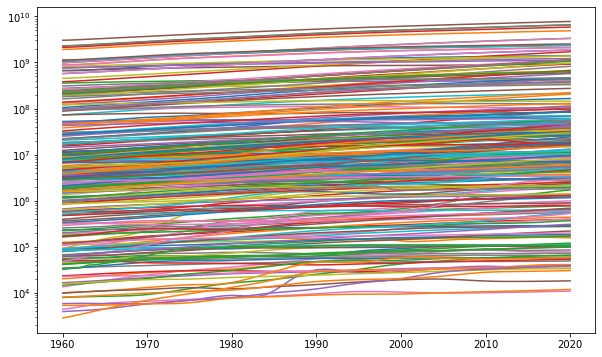

In [10]:
pop_df_clean.T.plot(legend = False, logy = True, figsize=(10,6));

**Fig 0** Population growth time series. This plot was made as the first attempt to visualize the dat in our dataset, however it is not very helpful. Standardizing the data is the option we choose to remove the order of magnitude variability.

In [11]:
# Standardized to the observation, not along the feature
X = preprocessing.scale(pop_df_clean, axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


In [12]:
X.shape

(262, 61)

In [13]:
X.std(axis = 1);

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

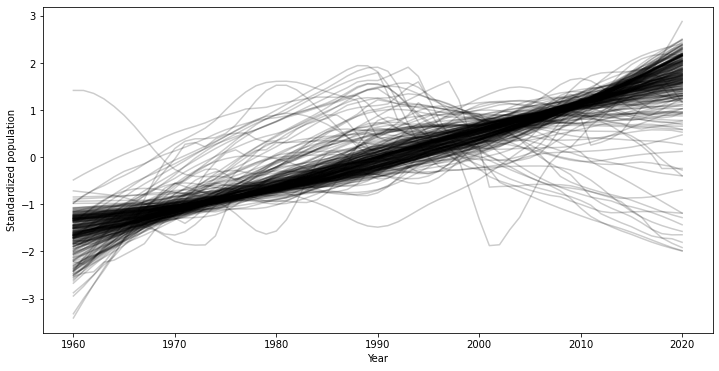

In [14]:
xticks_date = [str(i) for i in range(1960, 2030, 10)]
fig = pl.figure(figsize = (12,6))
pl.plot(X.T, 'k', alpha = 0.2);
pl.xticks(range(0,70,10), xticks_date)
pl.ylabel('Standardized population');
pl.xlabel('Year');

**Fig 1.** Standardized population time series plot. Our data spans the period between 1960 and 2020. At first glance, we can see that the majority of the countries have an increasing trend. Furthermore, we can easily identify some groups with fluctuations between 1980 and 2000

As we did in class, I'll be using a k means model to cluster my data, initially using 4 clusters. At the end of this work I will try using dbscan. 

In [15]:
groups = cluster.k_means(X, 4)

In [16]:
X.shape

(262, 61)

In [17]:
pop_df_clean.columns.values.shape

(61,)

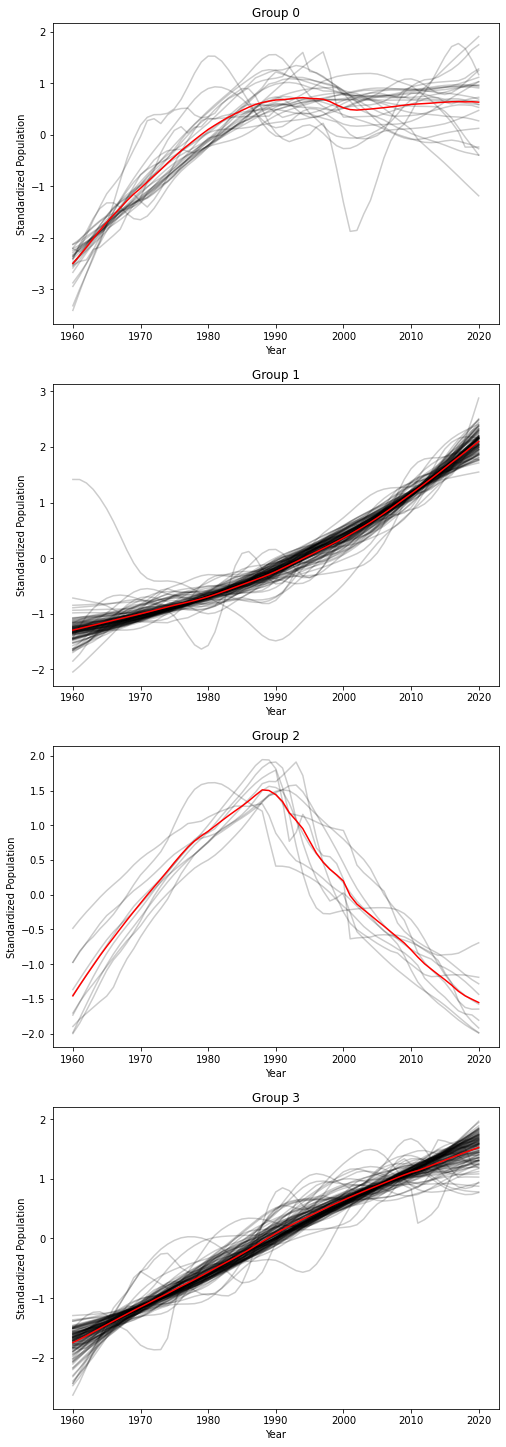

In [18]:
fig, ax = pl.subplots(4,1, figsize = (8,14))
pl.subplots_adjust(top = 1.5)
for i in range(4):
  ax[i].plot(X[groups[1] == i].T, c = 'k', alpha = 0.2);
  ax[i].plot(groups[0][i], lw = 1.5, c = 'r')
  ax[i].set_xlabel("Year")
  ax[i].set_ylabel("Standardized Population")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(xticks_date)
  ax[i].set_title('Group {}'.format(i))


**Fig 2** Clustered time series. If we look at cluster 0, the population grows until aroung 1990, after that point it plateaus and remains seemingly constant. In addition cluster 0 and 3 seem to be the less dense ones, when compared to clusters 1 and 2. Clusters 1 and 2 describe an increasing trend that is consisten through the whole period from 1960 to 2020. They do differ in the way their population seems to grow. For cluster 1 it has an exponencial-like shape, whereas cluster 2 seems more linear, with some countries clearly oscillating around a certain mean value. There is a clear outlier in cluster 1, however k-means does not directly tells us which country is it. A very straigthforward approach to identify the outliers might be calculating the distance between the cluster center and all its elements, and selecting the greater one.

The case of cluster 4 is considerably different from the other countries. These group had an increasing trend until it peaked in 1990, since then its population has been decreasing at high rates. Furthermore, it looks like there are no outliers within the cluster. We can not identify one element that looks significantly different.

Let's find which are the two smaller clusters

In [19]:
n_countries = np.zeros((np.unique(groups[1]).size,2))
for i in np.unique(groups[1]):
  n_countries[i,0] = i
  n_countries[i,1] = np.sum(groups[1] == i)
n_countries = n_countries[n_countries[:, 1].argsort()]

In [20]:
n_countries[:2,0]

array([2., 0.])

The clusters with the minimum number of countries are # 3 and 0. With 10 and 25 members respectively.


In [21]:
s = 'The countries in cluster 3 are \n'
for i in pop_df_clean.index[np.where(groups[1] == 3)[0]]:
  s = s + "->" + i + "\n"
print(s)

The countries in cluster 3 are 
->Andorra
->Argentina
->American Samoa
->Azerbaijan
->Bangladesh
->Bahamas, The
->Bermuda
->Brazil
->Barbados
->Brunei Darussalam
->Bhutan
->Botswana
->Central African Republic
->Canada
->Channel Islands
->Chile
->China
->Colombia
->Costa Rica
->Caribbean small states
->Germany
->Djibouti
->Dominican Republic
->Algeria
->East Asia & Pacific (excluding high income)
->Early-demographic dividend
->East Asia & Pacific
->Europe & Central Asia (excluding high income)
->Europe & Central Asia
->Ecuador
->Euro area
->Spain
->European Union
->Finland
->Fiji
->France
->Micronesia, Fed. Sts.
->Gibraltar
->Greece
->Guam
->High income
->Hong Kong SAR, China
->IBRD only
->IDA & IBRD total
->Indonesia
->Isle of Man
->India
->Iran, Islamic Rep.
->Italy
->Jamaica
->Kyrgyz Republic
->Korea, Rep.
->Latin America & Caribbean (excluding high income)
->Libya
->St. Lucia
->Latin America & Caribbean
->Liechtenstein
->Sri Lanka
->Lower middle income
->Low & middle income
->Lesoth

In [22]:
s = 'The countries in cluster 0 are \n'
for i in pop_df_clean.index[np.where(groups[1] == 0)[0]]:
  s = s + "->" + i + "\n"
print(s)

The countries in cluster 0 are 
->Albania
->Armenia
->Belarus
->Central Europe and the Baltics
->Cuba
->Curacao
->Czech Republic
->Dominica
->Faroe Islands
->Greenland
->Guyana
->Japan
->Kazakhstan
->Moldova
->North Macedonia
->Montenegro
->Poland
->Puerto Rico
->Russian Federation
->Serbia
->Slovak Republic
->Slovenia
->Tonga
->St. Vincent and the Grenadines
->Virgin Islands (U.S.)
->Kosovo



If we plot again these time series, we can analyze better their behavior

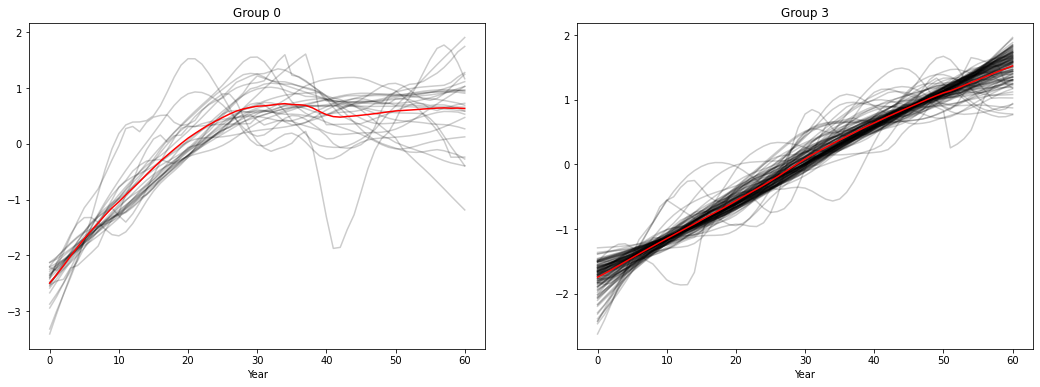

In [44]:
fig, ax = pl.subplots(1,2, figsize = (18,6))

ax[0].plot(X[groups[1] == 0].T, c = 'k', alpha = 0.2);
ax[0].plot(groups[0][0], lw = 1.5, c = 'r');
ax[0].set_xlabel("Year");
ax[0].set_title('Group {}'.format(0));

ax[1].plot(X[groups[1] == 3].T, c = 'k', alpha = 0.2);
ax[1].plot(groups[0][3], lw = 1.5, c = 'r');
ax[1].set_xlabel("Year");
ax[1].set_title('Group {}'.format(3));

**Fig 3.** Standardized time series for the two smaller clusters. After looking for the countries that belong to cluster 3. I found several [references](https://www.washingtonpost.com/opinions/global-opinions/the-incredible-shrinking-nations-of-eastern-europe/2019/11/11/fd777326-04a6-11ea-b17d-8b867891d39d_story.html) that suggest the fall of the soviet union as a breaking point for the immigration in eastern european countries, thus it explains at least to a certain degree the behavior displayed in the plots. 


In [25]:
cluster_var = []
for i in range(2,11):
  temp = cluster.k_means(X, i)
  c = 0 
  for j in range(0,temp[0].shape[0]):
    c = c + np.sum((X[temp[1] == j] - temp[0][j])**2)
  
  cluster_var.append(c)

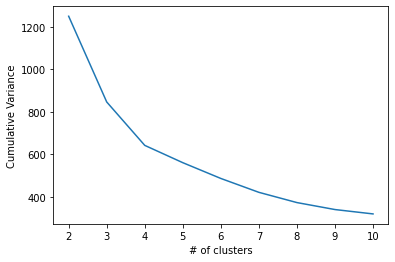

In [26]:
pl.plot(range(2,11), cluster_var)
pl.xlabel("# of clusters")
pl.ylabel("Cumulative Variance");

**Fig 4.** Cumulative variance against the number of clusters. This fgure is useful whe trying to determine the number of clusters present in the data, using the so called elbow method. In this case there is no clear "elbow", we could consider any value between 3, 4 and 5. For this work I only used 4 clusters with k means

In [27]:
groups_dbs = cluster.DBSCAN(eps=0.3, min_samples=5).fit(X)

In [28]:
n_clusters_ = len(set(groups_dbs.labels_)) - (1 if -1 in groups_dbs.labels_ else 0)

In [29]:
n_clusters_

2

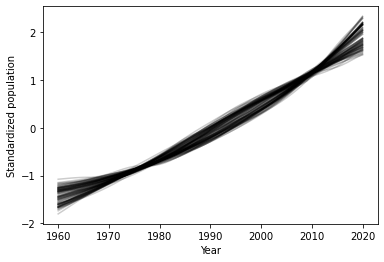

In [42]:
pl.plot(X[groups_dbs.labels_ == 0].T, 'k', alpha = 0.2);
pl.xticks(range(0,70,10), xticks_date);
pl.ylabel('Standardized population');
pl.xlabel('Year');

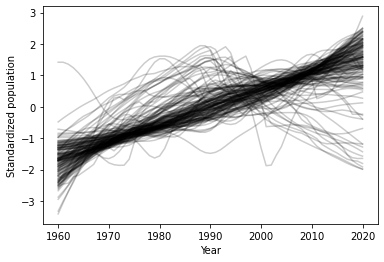

In [43]:
pl.plot(X[groups_dbs.labels_ == -1].T, 'k', alpha = 0.2);
pl.xticks(range(0,70,10), xticks_date);
pl.ylabel('Standardized population');
pl.xlabel('Year');

Dbscan was able to only find one cluster besides the outliers. When using this method I was not able to define a distance for our dataset, thus the eps hyperparameter used might be generating these results